In [2]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from soil_classifier.dataset import Landsat

cwd = os.getcwd()
DATA_FOLDER = cwd + '/data/'
OUTPUT_FOLDER = cwd + '/outputs/'

## Dataset loading

In [3]:
dataset = Landsat()
x_train, y_train, x_test, y_test = dataset.load()
num_classes = dataset.num_classes

print('Train samples = {}'.format(x_train.shape[0]))
print('Test samples = {}'.format(x_test.shape[0]))
print('Number of classes = {}'.format(num_classes))

Train samples = 4435
Test samples = 2000
Number of classes = 6


## Samples amount per class

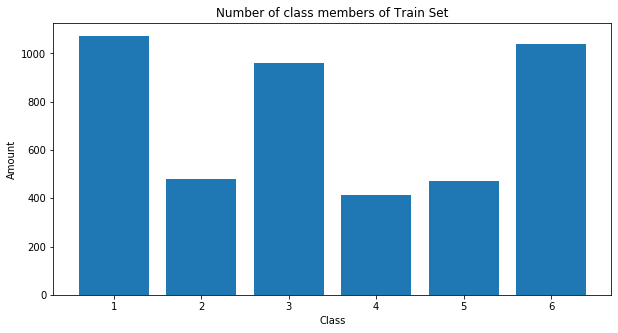

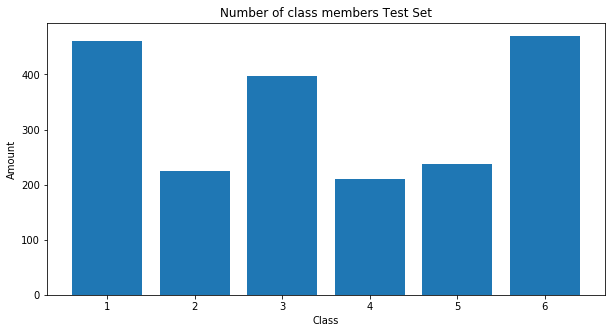

In [4]:
fig = plt.figure(figsize=(10,5))
plt.hist(y_train,range=(1,num_classes+1),bins=num_classes,align='left',rwidth=0.8)
plt.title('Number of class members of Train Set')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

fig.savefig(OUTPUT_FOLDER+'train_classes_num.png', dpi = 400)

fig = plt.figure(figsize=(10,5))
plt.hist(y_test,range=(1,num_classes+1),bins=num_classes,align='left',rwidth=0.8)
plt.title('Number of class members Test Set')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()
fig.savefig(OUTPUT_FOLDER+'test_classes_num.png', dpi = 400)

## Data visualization

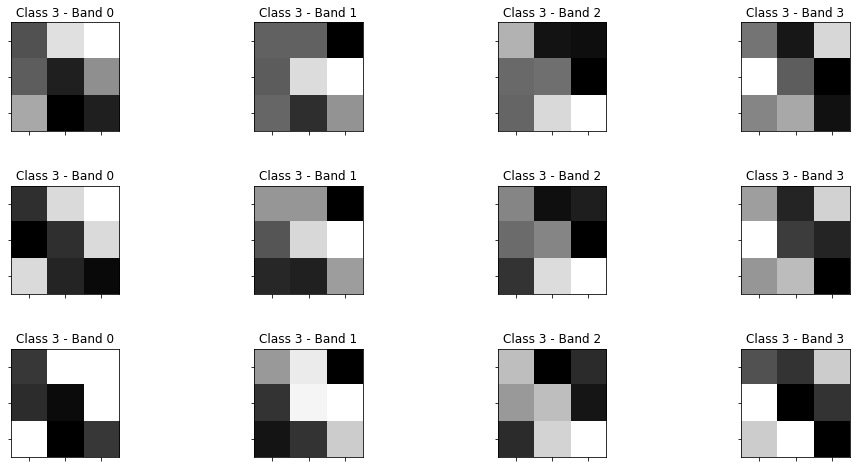

In [8]:
Nbands = dataset.num_bands
Nshow = 3

# idx_rnd = np.random.randint(np.size(x_train,0), size=(Nshow,1))
idx_rnd = np.linspace(0,Nshow-1,Nshow,dtype=np.int)

fig, splts = plt.subplots(Nshow,Nbands,figsize=(16,8))

plt.setp([a.get_xticklabels() for a in fig.axes[:]], visible=False)
plt.setp([a.get_yticklabels() for a in fig.axes[:]], visible=False)
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

for i in range(Nshow):
    for j in range(Nbands):
        splts[i,j].imshow(np.reshape(x_train[idx_rnd[i],j*9:(j+1)*9],(3,3)),cmap=cm.gray)
        splts[i,j].set_title('Class '+ str(int(y_train[idx_rnd[i]])) +' - Band ' + str(j))

plt.show()
fig.savefig(OUTPUT_FOLDER+'somesamples.png', dpi = 400)